In [1]:
%load_ext autoreload
%autoreload 2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import sys
import time

# from Shapley import ShapNN
import DShap

# from DShap import DShap
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from shap_utils import *

# %matplotlib inline
MEM_DIR = "./"
# import matplotlib
# matplotlib.use('TkAgg')

In [5]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import ResNet18_Weights, resnet18

train = torchvision.datasets.CIFAR10(
    "./data",
    train=True,
    transform=transforms.Compose([transforms.ToTensor()]),
    download=True,
)
upsample = torch.nn.Upsample(scale_factor=2)
x = upsample(torch.tensor(train.data).moveaxis(-1, 1) / 255)
y = torch.tensor(train.targets)

bs = 32
extractor = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).cuda()
x = torch.cat(
    [
        extractor(x[i * bs : (i + 1) * bs].cuda()).detach().cpu()
        for i in range(x.shape[0] // bs)
    ]
)

Files already downloaded and verified


In [8]:
num_train = 3000
num_test = 1000
train_set = torch.utils.data.TensorDataset(x[:num_train], y[:num_train])
test_set = torch.utils.data.TensorDataset(x[:num_test], y[:num_test])

In [10]:
from importlib import reload

reload(DShap)
dshap = DShap.DShap(
    train_set, test_set, use_features=True, num_test=500, directory="results"
)

LR(
  (linear): Linear(in_features=1000, out_features=10, bias=True)
)
init score start
init score done


In [ ]:
dshap.run(1, 0.5, g_run=False, max_iterations=10)

starting loo score calculations!


/u/luchar/DataShapley/Shapley.py:187: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vals_metrics, idxs = np.array(vals), np.array(idxs)


  0%|          | 0/3000 [00:00<?, ?it/s]

In [9]:
from Shapley import LR
from sklearn.metrics import accuracy_score

model = LR().cuda()

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epoch_train_loss = []
epoch_test_loss = []
epoch_train_acc = []
epoch_test_acc = []

for i in range(20):
    train_loss = []
    test_loss = []
    train_pred = []
    test_pred = []
    train_true = []
    test_true = []
    for x, y in train_set:
        pred = model(x.cuda())
        loss = loss_fn(pred, y.cuda())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss.append(loss.detach().cpu().item())
        train_pred.append(pred.argmax().item())
        train_true.append(y.detach().cpu().item())

    for x, y in test_set:
        pred = model(x.cuda())
        loss = loss_fn(pred, y.cuda())

        test_loss.append(loss.detach().cpu().item())
        test_pred.append(pred.argmax().item())
        test_true.append(y.detach().cpu().item())

    epoch_train_loss.append(np.mean(train_loss))
    epoch_test_loss.append(np.mean(test_loss))
    epoch_train_acc.append(accuracy_score(train_true, train_pred))
    epoch_test_acc.append(accuracy_score(test_true, test_pred))

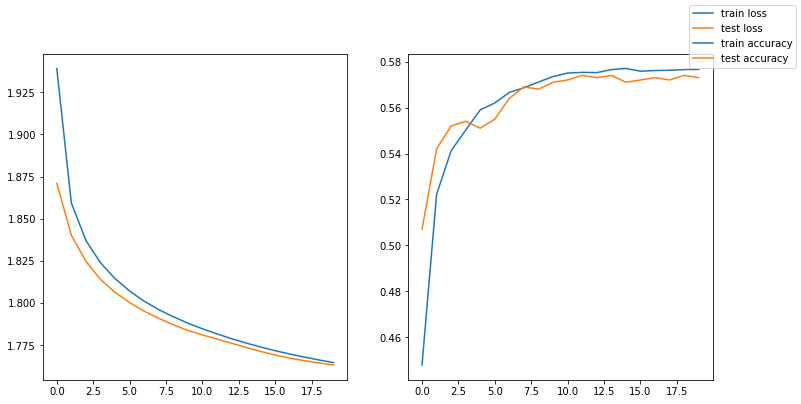

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].plot(epoch_train_loss, label="train loss")
ax[0].plot(epoch_test_loss, label="test loss")
ax[1].plot(epoch_train_acc, label="train accuracy")
ax[1].plot(epoch_test_acc, label="test accuracy")
fig.legend()
# plt.show()

In [94]:
plt.plot(epoch_train_loss)

In [93]:
plt.ioff()

In [28]:
dshap._tol_mean_score()

In [29]:
dshap.mean_score

0.492425

In [32]:
dshap.one_iteration(0.1)

  0%|          | 0/10000 [00:00<?, ?it/s]

/u/luchar/DataShapley/DShap.py:368: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # if self.sample_weight is None:
/u/luchar/DataShapley/DShap.py:369: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # sample_weight_batch = None


0.367675 0.0492425
0.351425 0.0492425
0.329175 0.0492425
0.32742499999999997 0.0492425
0.305925 0.0492425
0.30867500000000003 0.0492425
0.301425 0.0492425
0.308175 0.0492425
0.310425 0.0492425
0.310175 0.0492425
0.315425 0.0492425
0.29917499999999997 0.0492425
0.30217499999999997 0.0492425
0.312425 0.0492425
0.30667500000000003 0.0492425
0.265175 0.0492425
0.26392499999999997 0.0492425
0.261675 0.0492425
0.257925 0.0492425
0.247675 0.0492425
0.247675 0.0492425
0.254925 0.0492425
0.255425 0.0492425
0.253675 0.0492425
0.23717500000000002 0.0492425
0.244175 0.0492425
0.25417500000000004 0.0492425
0.248925 0.0492425
0.23367500000000002 0.0492425
0.205175 0.0492425
0.208675 0.0492425
0.20792500000000003 0.0492425
0.202175 0.0492425
0.200175 0.0492425
0.20742500000000003 0.0492425
0.206675 0.0492425
0.21142499999999997 0.0492425
0.21342499999999998 0.0492425
0.20642500000000003 0.0492425
0.21492499999999998 0.0492425
0.21392499999999998 0.0492425
0.20542500000000002 0.0492425
0.2069250000000

KeyboardInterrupt: 

In [25]:
dshap.model.fit(*train_set.tensors, *test_set.tensors, batch_size=32)

In [27]:
dshap.model.history.keys()

dict_keys(['metrics', 'idxs'])

LOO values calculated!


  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

/u/luchar/DataShapley/DShap.py:361: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_batch = torch.cat([y_batch, torch.tensor(self.y_train[sources[idx]], dtype=torch.long)])
/u/luchar/DataShapley/DShap.py:362: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # if self.sample_weight is None:


2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

2 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

3 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

4 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

5 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1 out of 5 TMC_Shapley iterations.


  0%|          | 0/128 [00:00<?, ?it/s]

In [ ]:
set(dshap.y_train.numpy())

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [3]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver="liblinear", hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(
        mean=np.zeros(d), cov=np.eye(d), size=train_size + 5000
    )
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param=_param, difficulty=difficulty, important=important_dims
    )
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print("Performance using the whole training set = {0:.2f}".format(test_acc))

Performance using the whole training set = 0.70


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [4]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = "logistic"
problem = "classification"
num_test = 1000
directory = "./temp"
dshap = DShap(
    X,
    y,
    X_test,
    y_test,
    num_test,
    sources=None,
    sample_weight=None,
    model_family=model,
    metric="accuracy",
    overwrite=True,
    directory=directory,
    seed=0,
)
dshap.run(100, 0.1, g_run=False)

Starting LOO score calculations!
LOO values calculated!
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iter

In [5]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = "logistic"
problem = "classification"
num_test = 1000
directory = "./temp"
dshap = DShap(
    X,
    y,
    X_test,
    y_test,
    num_test,
    model_family=model,
    metric="accuracy",
    directory=directory,
    seed=1,
)
dshap.run(100, 0.1)

[autoreload of Shapley failed: Traceback (most recent call last):
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/u/luchar/DataShapley/Shapley.py", line 3, in <module>
    import torch
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/torch/__init__.py", line 229, in <module>
    from torch._C import *  # noqa: F403
ImportError: /h

LOO values calculated!


2023-06-14 14:35:52.914251: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:35:52.935669: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

10 out of 100 G-Shapley iterations


2023-06-14 14:36:27.880242: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:36:27.908815: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:36:34.919277: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:36:34.947871: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:36:42.062444: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:36:42.091425: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:36:49.222876: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:36:49.252749: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:36:56.198532: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:36:56.229272: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:37:03.278460: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:37:03.310530: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:37:10.344955: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:37:10.379785: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:37:17.329220: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:37:17.361288: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:37:24.441329: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:37:24.474718: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.


2023-06-14 14:38:46.143960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2401 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:3b:00.0, compute capability: 6.1
2023-06-14 14:38:46.146070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9821 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:5e:00.0, compute capability: 6.1
2023-06-14 14:38:46.147029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10073 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:86:00.0, compute capability: 6.1
2023-06-14 14:38:46.147948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10073 MB memory:  -> device: 3, name: NVIDIA GeForce G

10 out of 100 G-Shapley iterations


2023-06-14 14:38:53.378671: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:38:53.407216: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:39:00.772279: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:00.800702: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:39:07.839204: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:07.871933: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:39:14.810380: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:14.841174: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:39:21.733154: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:21.765104: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:39:28.926979: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:28.958398: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:39:36.088260: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:36.120158: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:39:43.389019: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:43.422117: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:39:50.738284: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:39:50.772656: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.


2023-06-14 14:41:10.626632: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2401 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:3b:00.0, compute capability: 6.1
2023-06-14 14:41:10.628376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9821 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:5e:00.0, compute capability: 6.1
2023-06-14 14:41:10.629199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10073 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:86:00.0, compute capability: 6.1
2023-06-14 14:41:10.629982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10073 MB memory:  -> device: 3, name: NVIDIA GeForce G

10 out of 100 G-Shapley iterations


2023-06-14 14:41:17.400309: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:17.415581: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:41:23.662788: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:23.692362: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:41:30.860910: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:30.891275: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:41:38.177510: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:38.208439: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:41:45.622131: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:45.653211: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:41:53.051705: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:41:53.083295: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:42:00.474248: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:42:00.507627: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:42:07.907999: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:42:07.941507: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:42:15.402242: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:42:15.435714: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 10

In [6]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = "logistic"
problem = "classification"
num_test = 1000
directory = "./temp"
dshap = DShap(
    X,
    y,
    X_test,
    y_test,
    num_test,
    model_family=model,
    metric="accuracy",
    directory=directory,
    seed=2,
)
dshap.run(100, 0.1)

[autoreload of Shapley failed: Traceback (most recent call last):
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/u/luchar/DataShapley/Shapley.py", line 3, in <module>
    import torch
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/torch/__init__.py", line 229, in <module>
    from torch._C import *  # noqa: F403
ImportError: /h

LOO values calculated!


2023-06-14 14:48:31.219120: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:48:31.237627: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

10 out of 100 G-Shapley iterations


2023-06-14 14:49:06.690840: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:06.719845: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:49:13.580592: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:13.615962: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:49:20.458487: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:20.488108: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:49:27.216853: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:27.249698: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:49:34.401957: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:34.433091: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:49:41.645314: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:41.676431: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:49:48.918505: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:48.950913: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:49:57.351504: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:49:57.400617: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:50:10.250943: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:50:10.298296: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.


2023-06-14 14:51:39.470191: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2401 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:3b:00.0, compute capability: 6.1
2023-06-14 14:51:39.471974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9821 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:5e:00.0, compute capability: 6.1
2023-06-14 14:51:39.472834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10073 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:86:00.0, compute capability: 6.1
2023-06-14 14:51:39.473674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10073 MB memory:  -> device: 3, name: NVIDIA GeForce G

10 out of 100 G-Shapley iterations


2023-06-14 14:51:53.989936: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:51:54.015650: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:52:08.681566: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:52:08.716674: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:52:22.429787: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:52:22.454941: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:52:36.468915: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:52:36.492105: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:52:51.299929: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:52:51.353757: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:53:05.728706: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:53:05.767285: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:53:21.135027: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:53:21.193295: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:53:36.318597: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:53:36.364622: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:53:51.448313: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:53:51.494084: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.


2023-06-14 14:55:23.110551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2401 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:3b:00.0, compute capability: 6.1
2023-06-14 14:55:23.112154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9821 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:5e:00.0, compute capability: 6.1
2023-06-14 14:55:23.112960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10073 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:86:00.0, compute capability: 6.1
2023-06-14 14:55:23.113725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10073 MB memory:  -> device: 3, name: NVIDIA GeForce G

10 out of 100 G-Shapley iterations


2023-06-14 14:55:39.505279: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:55:39.549031: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

20 out of 100 G-Shapley iterations


2023-06-14 14:55:56.533398: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:55:56.578234: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

30 out of 100 G-Shapley iterations


2023-06-14 14:56:13.279525: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:56:13.314906: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

40 out of 100 G-Shapley iterations


2023-06-14 14:56:28.165200: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:56:28.206378: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

50 out of 100 G-Shapley iterations


2023-06-14 14:56:43.152972: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:56:43.196950: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

60 out of 100 G-Shapley iterations


2023-06-14 14:57:01.349664: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:57:01.394406: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

70 out of 100 G-Shapley iterations


2023-06-14 14:57:17.726916: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:57:17.771080: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

80 out of 100 G-Shapley iterations


2023-06-14 14:57:33.883285: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:57:33.928451: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

90 out of 100 G-Shapley iterations


2023-06-14 14:57:48.904039: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-14 14:57:48.942471: W tensorflow/c/c_api.cc:300] Operation '{name:'final/Db/Assign' id:30 op device:{requested: '', assigned: ''} def:{{{node final/Db/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](final/Db, final/Db/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running 

100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 10

Now we merge results for the parallel runs:

In [7]:
dshap.merge_results()

/u/luchar/DataShapley/DShap.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':
[autoreload of Shapley failed: Traceback (most recent call last):
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/luchar/.pyenv/versions/3.10.8/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in 

./temp/mem_tmc_0001.pkl
./temp/mem_tmc_0000.pkl
./temp/mem_tmc_0002.pkl
./temp/mem_g_0000.pkl
./temp/mem_g_0001.pkl
./temp/mem_g_0002.pkl


Let's look at the convergence plots of the algorithms.

In [8]:
convergence_plots(dshap.marginals_tmc)

In [9]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

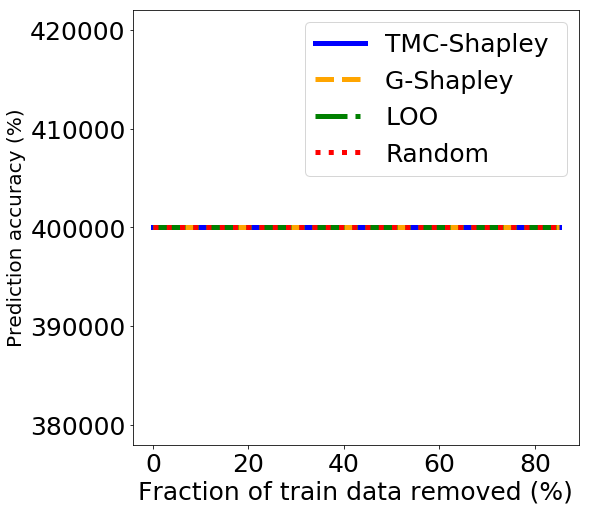

In [68]:
dshap.performance_plots(
    [dshap.vals_tmc, dshap.vals_g, dshap.vals_loo],
    num_plot_markers=20,
    sources=dshap.sources,
)